In [1]:
import tdms
import imp
imp.reload(tdms)
import plot
import functions
import numpy as np
import matplotlib
import filter
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Open file & plot traces

In [4]:
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/D2-vc-060717-vc2-1.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1701-9VCLAMPNACURRENT.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1702-1.tdms")
data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-CELL62_JM_gly-2-563399762.tdms")

In [5]:
data.keys()

['dt', 'yunits', u'AI0', u'AO0']

In [6]:
holding = -40
starttime = 20000

<IPython.core.display.Javascript object>


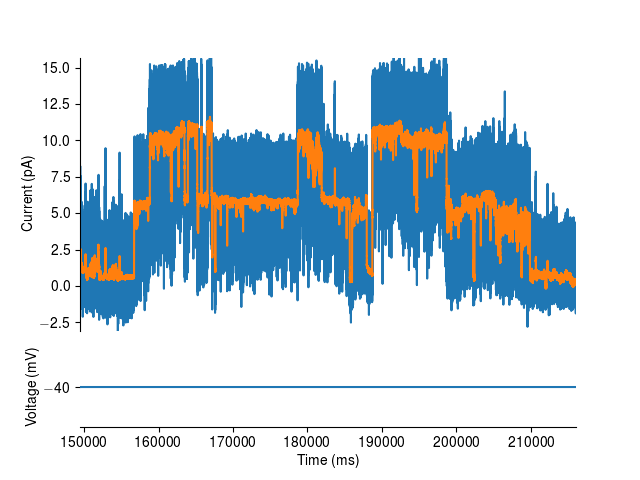

<IPython.core.display.Javascript object>


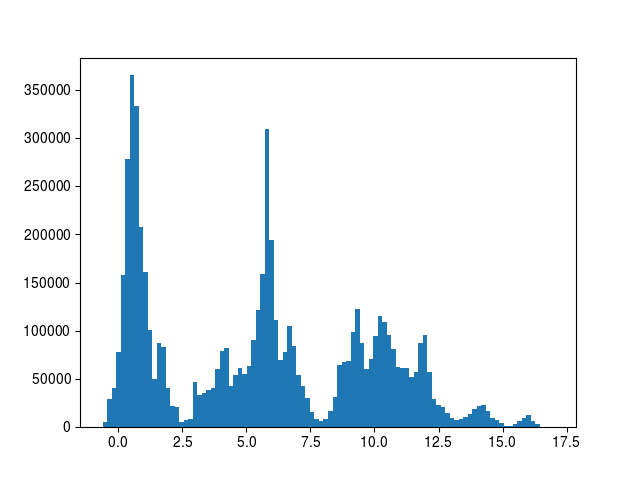

In [7]:
sweep = np.concatenate([sw for sw in data['AI0']])
sweep_filtered = filter.bandpass(sweep, data['dt'], 0.0000001, 0.02)
command = np.concatenate([co for co in data['AO0']])[:sweep.shape[0]]

fig, axi, axv = plot.plot_traces(mode='vclamp')

times = np.arange(sweep.shape[0])*data['dt']
axi.plot(times, sweep)
axi.plot(times, sweep_filtered)
axv.plot(times, holding + command)

fig = plt.figure()
res = plt.hist(sweep_filtered[int(starttime/data['dt']):], bins=100)
plt.show()

In [9]:
binvalues = res[0]
binedges = res[1]
print(binvalues.shape, binedges.shape)

((100,), (101,))


In [10]:
T = np.sum(binvalues)
t_openings1 = np.sum(binvalues[(binedges[:-1]>2.5) & (binedges[:-1]<7.6)])
t_openings2 = np.sum(binvalues[(binedges[:-1]>7.5)]) * 2

In [11]:
P_open = (t_openings1 + t_openings2)/(2.0*T)

In [12]:
print(P_open)

0.496769924212
